<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import jarque_bera
import statsmodels.stats.api as smt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE 
plt.rcParams['figure.figsize']=(15,8)

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
df = pd.read_csv('Likes.csv')
df = pd.get_dummies(df,drop_first=True)
df.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0,1
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0,1
2,1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0,0
3,1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0,1
4,1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0,1


<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

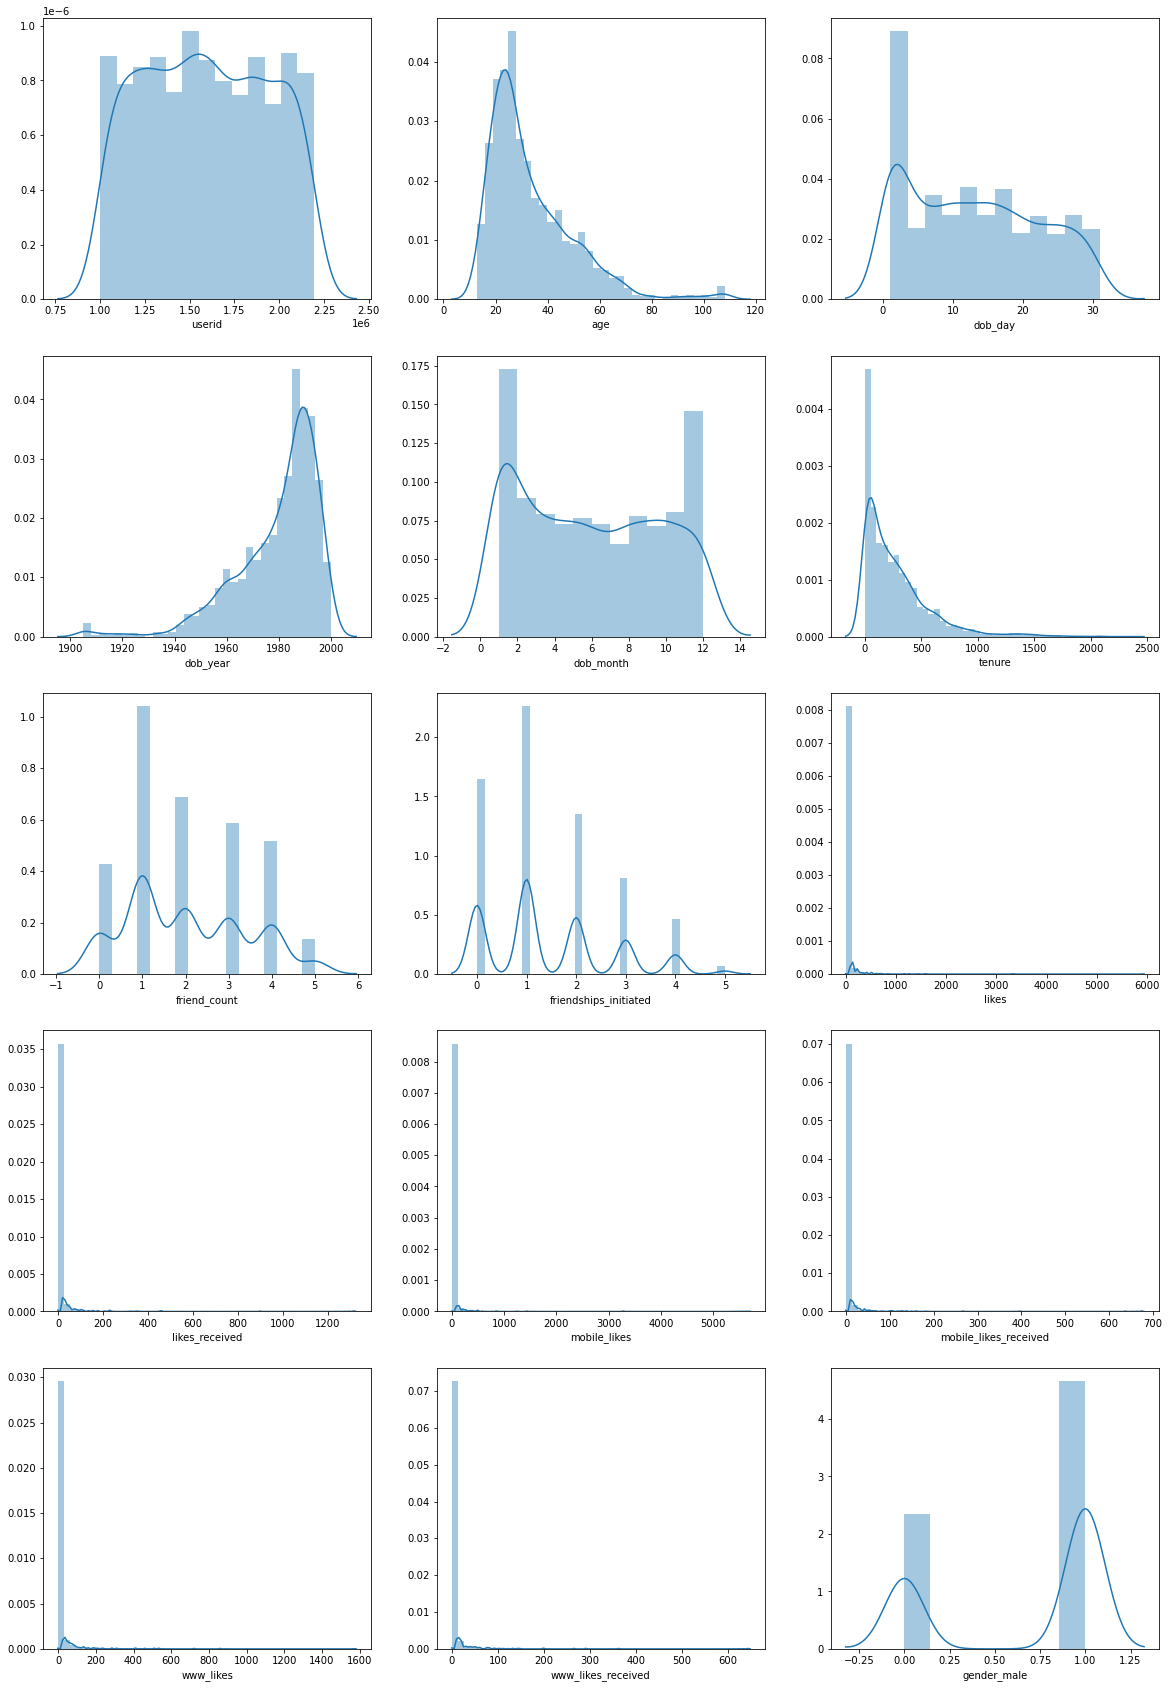

In [3]:
## PLOT-1 : Distribution Plot for all Features
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(20,30))
for var, ax1 in zip(df.columns[:], ax.flatten()) :
    sns.distplot(df[var], ax=ax1)


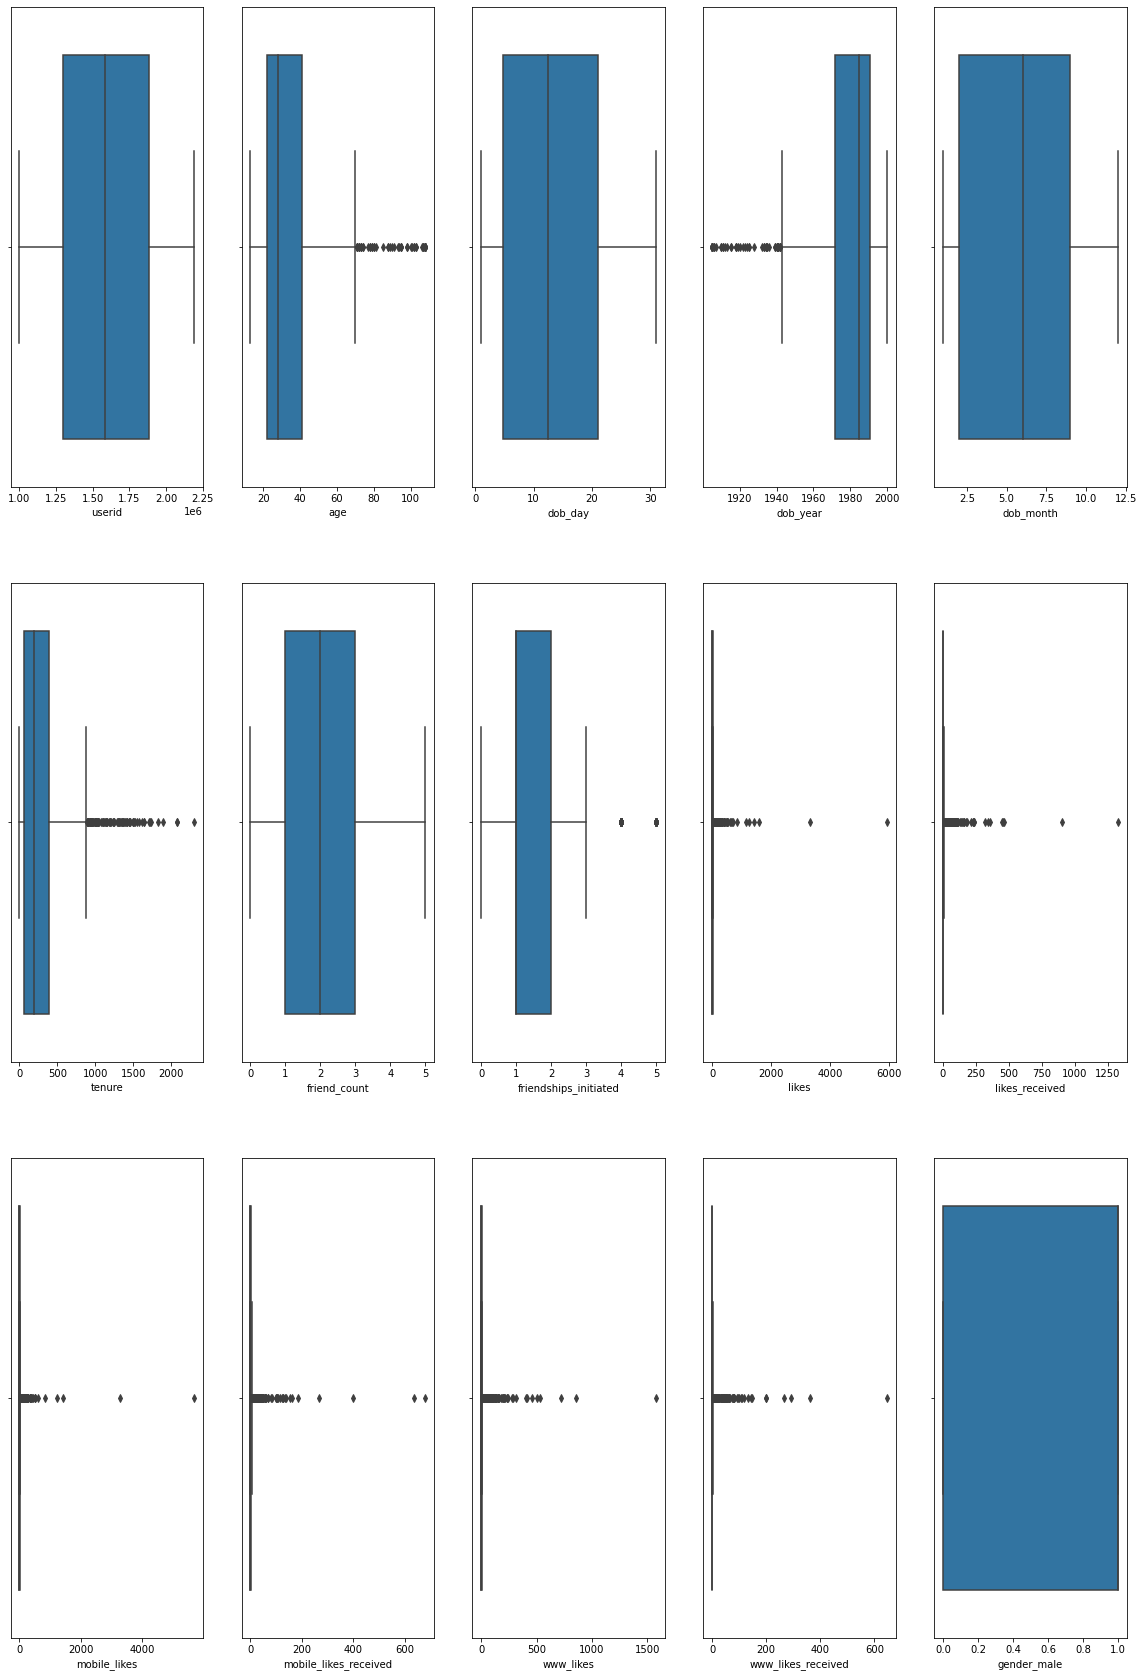

In [4]:
## PLOT-2 : Box Plot for all Features
fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(20,30))
for i,ax in zip(range(15),axes.flat):
    sns.boxplot(df[df.columns.tolist()[i]],ax=ax)
plt.show()

### From BoxPlots, we can tell that age, dob_year, tenure, friendships_initiated, likes, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received columns have Outliers.

In [5]:
df.skew()

Skewness of userid is : 0.02900669067551328
Skewness of age is : 1.6285741973183543
Skewness of dob_day is : 0.24190766041491962
Skewness of dob_year is : -1.6285741973183634
Skewness of dob_month is : 0.1602823038779257
Skewness of tenure is : 2.0835496317796776
Skewness of friend_count is : 0.3393673207205632
Skewness of friendships_initiated is : 0.6949581587593883
Skewness of likes is : 24.959317269166796
Skewness of likes_received is : 18.41802118414414
Skewness of mobile_likes is : 28.564966395855492
Skewness of mobile_likes_received is : 18.566706217408104
Skewness of www_likes is : 16.9414933800755
Skewness of www_likes_received is : 17.059494179217833
Skewness of gender_male is : -0.701566243834036


### From above Output and from Distribution plots we can tell that age, dob_year, tenure, likes, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received columns are skewed.

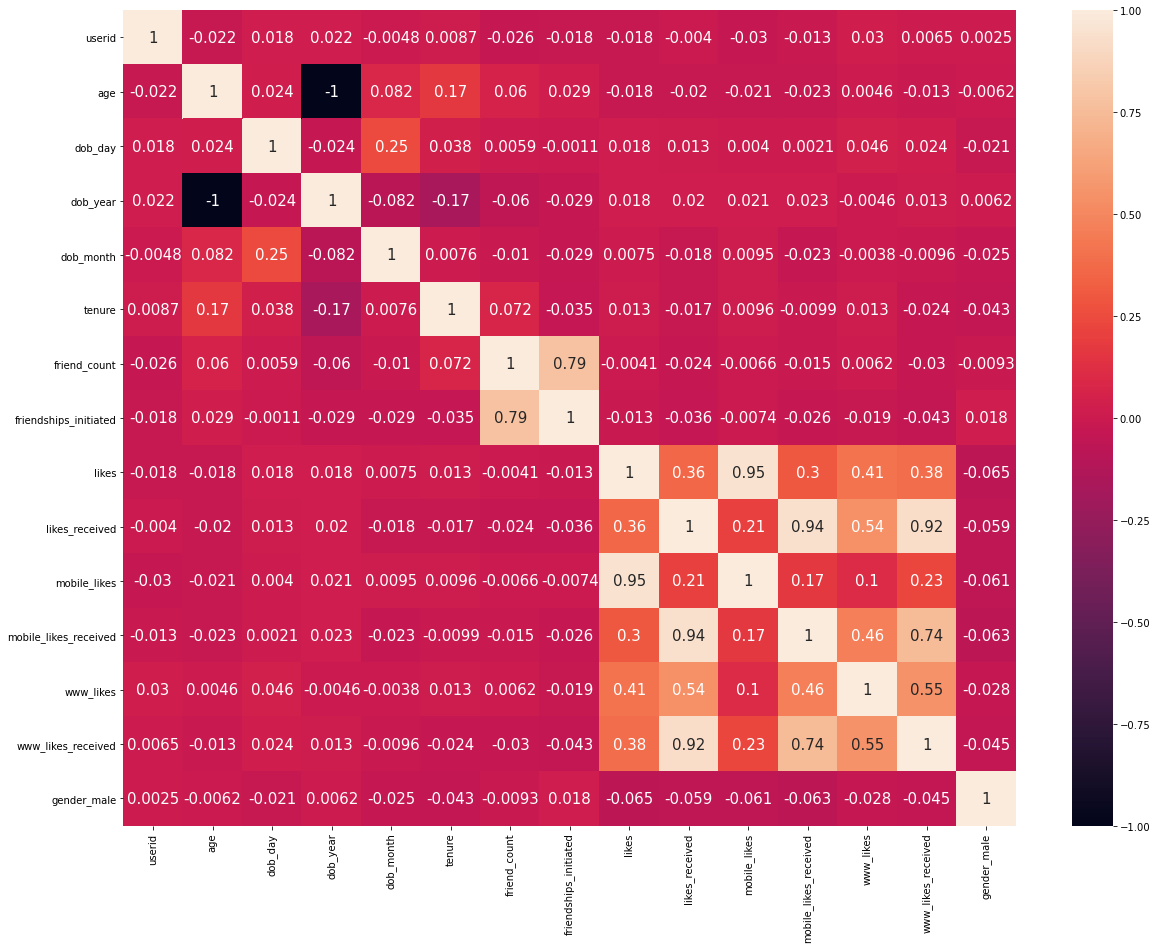

In [6]:
## 2 : PLOT THE HEAT MAP
## STEP-1 : Write the inference on the dependent variable and independent variable having the most (Positive and Negative) 
# correlation columns
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 15})
plt.show()

In [7]:
df.corr()['likes']

userid                  -0.017626
age                     -0.017579
dob_day                  0.018238
dob_year                 0.017579
dob_month                0.007488
tenure                   0.012983
friend_count            -0.004093
friendships_initiated   -0.012678
likes                    1.000000
likes_received           0.364043
mobile_likes             0.948933
mobile_likes_received    0.302722
www_likes                0.411800
www_likes_received       0.383455
gender_male             -0.064554
Name: likes, dtype: float64

### From above output we can tell that mobile_likes feature is highly corelated with dependent Feature(likes)

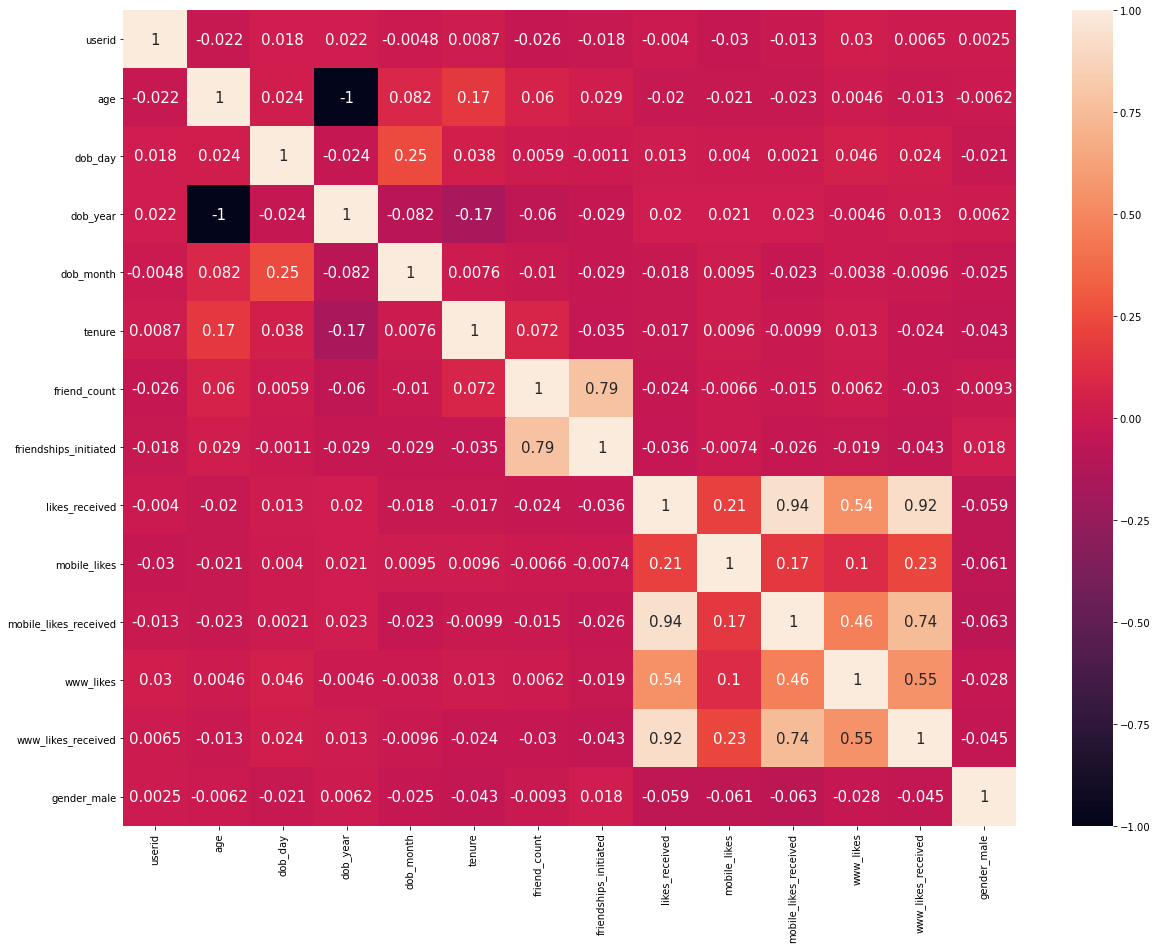

In [8]:
## Step - 2 : Write the inference on the correlation among independent variables
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.drop('likes',axis=1).corr(), annot = True, annot_kws = {"size": 15})
plt.show()

### friend_count and friendships_initiated , www_likes_received and likes_received, www_likes and likes_received, mobile_likes_received and likes_received are positively Corelated. 

### dob_year and age are negatively corelated

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [9]:
## 1. Split the dataset in dependent variable and independent
y = df['likes']
x = df.drop('likes', axis=1)

In [10]:
## 3. Scale the features
## Getting minimum values and maximum values if we have large difference then we need to scale the Features
for i in df.columns :
    print('Difference b/w Minimum Value and Maximum value of',i ,'is :',df[i].max()-df[i].min())

Difference b/w Minimum Value and Maximum value of userid is : 1192673
Difference b/w Minimum Value and Maximum value of age is : 95
Difference b/w Minimum Value and Maximum value of dob_day is : 30
Difference b/w Minimum Value and Maximum value of dob_year is : 95
Difference b/w Minimum Value and Maximum value of dob_month is : 11
Difference b/w Minimum Value and Maximum value of tenure is : 2303
Difference b/w Minimum Value and Maximum value of friend_count is : 5
Difference b/w Minimum Value and Maximum value of friendships_initiated is : 5
Difference b/w Minimum Value and Maximum value of likes is : 5936
Difference b/w Minimum Value and Maximum value of likes_received is : 1326
Difference b/w Minimum Value and Maximum value of mobile_likes is : 5704
Difference b/w Minimum Value and Maximum value of mobile_likes_received is : 679
Difference b/w Minimum Value and Maximum value of www_likes is : 1580
Difference b/w Minimum Value and Maximum value of www_likes_received is : 647
Differen

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

df['tenure'] = mm.fit_transform(df[['tenure']])
df['likes_received'] = mm.fit_transform(df[['likes_received']])
df['mobile_likes'] = mm.fit_transform(df[['mobile_likes']])
df['mobile_likes_received'] = mm.fit_transform(df[['mobile_likes_received']])
df['www_likes'] = mm.fit_transform(df[['www_likes']])
df['www_likes_received'] = mm.fit_transform(df[['www_likes_received']])



In [12]:
y = df['likes']
x = df.drop('likes', axis=1)

In [13]:
## 4. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
                                                    

<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [14]:
## 1. Use Linear Regression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [15]:
## Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference
print('R-square for Train model is :',model.score(X_train,y_train))
print('RMSE for Train model is     :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('R-square for Test model is  :',model.score(X_test,y_test))
print('RMSE for Test model is      :',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R-square for Train model is : 1.0
RMSE for Train model is     : 2.0062428470331336e-10
R-square for Test model is  : 1.0
RMSE for Test model is      : 2.0310932002068045e-10


In [16]:
## Feature selection using RFE

In [17]:
## STEP-1 : checking optimal number of features between 4 and 30

## RFE 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

lir = LinearRegression()
rfe = RFE(lir,n_features_to_select= 12)

In [18]:
## STEP-2 : RFE with n Features
rfe_model=rfe.fit(x,y)
rfe_model.ranking_

array([3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
## Step-4 : Fit with n features
X=df[['friend_count', 'friendships_initiated', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received', 'gender_male']]
y=df["likes"]

In [24]:
## Step-6 : Training and Test data for n Features
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [25]:
## Step-7 : Adding a constant to model 
xc = sm.add_constant(X_train)

In [26]:
## Step-8 : Fit OLS model with n features
model = sm.OLS(y_train, xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.414e+30
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        16:29:14   Log-Likelihood:                 37541.
No. Observations:                1472   AIC:                        -7.507e+04
Df Residuals:                    1464   BIC:                        -7.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.391e-12   1.24e-13     35.519      0.000    4.15e-12    4.63e-12
friend_count          -8.149e-13   6.18e-14    -13.177      0.000   -9.36e-13   -6.94e-13
friendships_initiated  2.276e-13   6.93e-14      3.287      0.001    9.18e-14    3.63e-13
likes_received        -2.366e-12   8.26e-13     -2.864      0.004   -3.99e-12   -7.46e-13
mobile_likes           5704.0000    2.1e-12   2.72e+15      0.000    5704.000    5704.000
mobile_likes_received  1.137e-12    2.3e-12      0.494      0.621   -3.38e-12    5.65e-12
www_likes              1580.0000   2.54e-12   6.23e+14      0.000    1580.000    1580.000
www_likes_received    -1.847e-12   2.89e-12     -0.639      0.523   -7.51e-12    3.82e-12
gender_male           -3.634e-12   1.14e-13    -31.935      0.000   -3.86e-12   -3.41e-12
==============================================================================
Omnibus:                      190.667   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.321
Skew:                          -0.448   Prob(JB):                     8.97e-21
Kurtosis:                       2.162   Cond. No.                     8.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
## Step-9 : Calculate Evaluation metrics 
y_pred=model.predict(xc)
t_c=sm.add_constant(X_test)
y_test_pred=model.predict(t_c)
print("RMSE_train     :",np.sqrt(mean_squared_error(y_train,y_pred)))
print('R-Square_train :',r2_score(y_train,y_pred))

print("RMSE_test      :",np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('R-Square_test  :',r2_score(y_test,y_test_pred))

RMSE_train     : 2.0308921603824678e-12
R-Square_train : 1.0
RMSE_test      : 2.081517903198815e-12
R-Square_test  : 1.0


In [49]:
## Step-10 : Plot r2 and RMSE against n_features
metrics=pd.DataFrame({"RMSE":[np.sqrt(mean_squared_error(y_train,y_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))],
                      "R2":[r2_score(y_train,y_pred),r2_score(y_test,y_test_pred)]},index=["Train","Test"])
metrics['RMSE'] = metrics['RMSE'] * (10**11)

<Figure size 504x360 with 0 Axes>

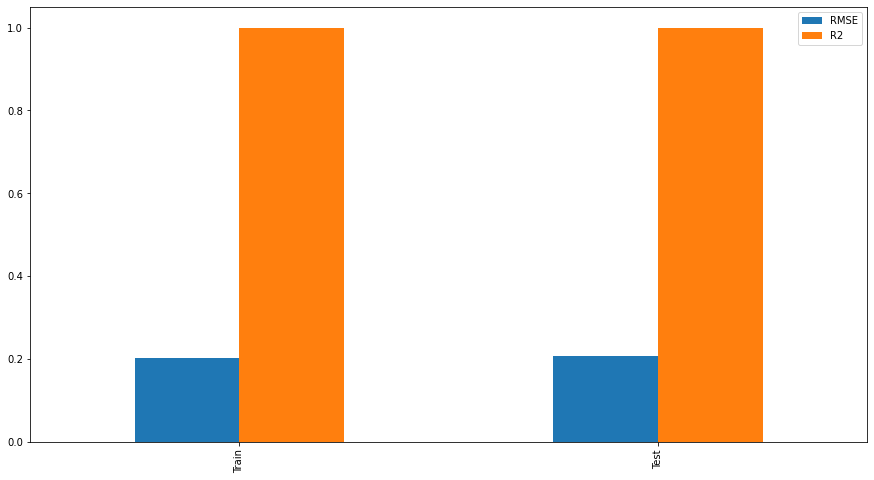

In [50]:
plt.figure(figsize=(7,5))
metrics.plot(kind="bar")
plt.show()

In [51]:
## Step - 11 Final Inference 
## Model is Over Fitting 

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

In [53]:
## 1. Linearity of Model 
stat,pval=sm.stats.diagnostic.linear_rainbow(model,frac=0.5)
print("statval",stat)
print("pval",pval)

statval 39.53063997600779
pval 0.0


In [ ]:
#p<0.05 , hence we reject null and we conclude model is not  linear ( not appropriate)

In [55]:
## 2. Homoscedasticity (equal variance) of residuals
import statsmodels.stats.api as sms
residuals = model.resid
sms.het_goldfeldquandt(y=residuals, x=xc)

(0.24054290820424526, 0.9999999999999999, 'increasing')

In [ ]:
## Since p-value(0.9999999999999999) is greater than 0.05, we will accept H0 to conclude that variance of residuals is constant.

In [56]:
## 3. Normality of Residuals
stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=92.32096149776231, pvalue=0.0)

In [ ]:
#p<0.05 , hence we reject null and we conclude residuals are not normal

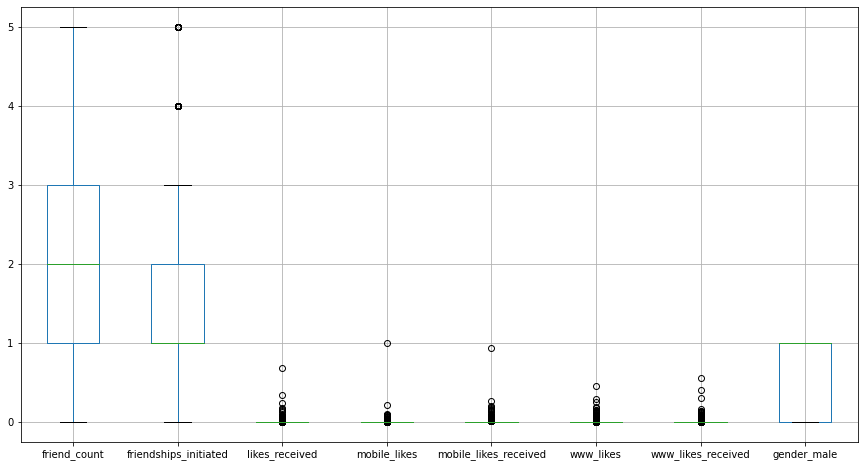

In [59]:
## 4. Identifying Outliers 
X_train.boxplot()

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

<Figure size 1080x576 with 0 Axes>

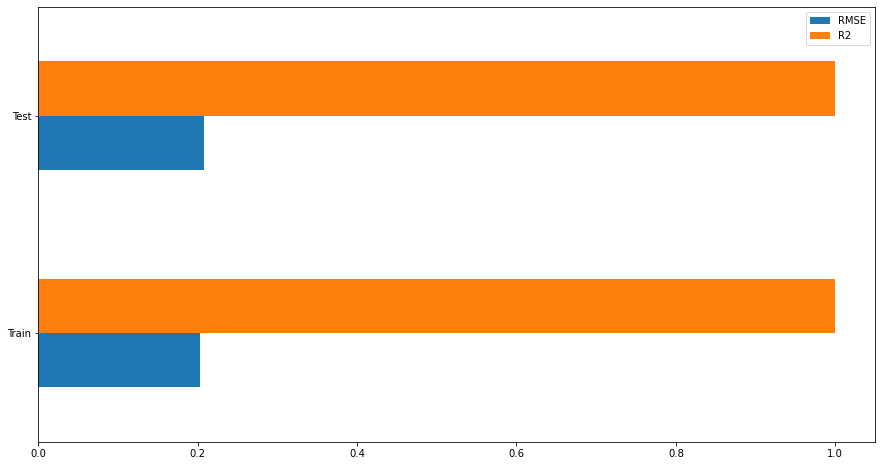

In [60]:
## A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.
plt.figure(figsize=(15,8))
metrics.plot(kind="barh")
plt.show()

In [62]:
## B. K-Fold Cross Validation
from sklearn.model_selection import cross_val_score,KFold,cross_validate

kfold=KFold(n_splits=3,shuffle=True)
cv=cross_val_score(lr,X=X,y=y,cv=kfold,scoring="r2")

er=cross_val_score(lr,X=X,y=y,cv=3,scoring="neg_mean_squared_error")
print("cv mean is            :",cv.mean())
print("Minimum value is      :",cv.min())
print("Maximum values is     :",cv.max())
print('Mean_Squared_error is :',np.sum(np.abs(er)))

cv mean is            : 1.0
Minimum value is      : 1.0
Maximum values is     : 1.0
Mean_Squared_error is : 2.143263544982698e-24
